In [0]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cvxpy import *

In [3]:
#read file 
market_price = pd.read_csv("monthly_prices.csv")
market_price.head(5)

,Unnamed: 0,MSFT,V,WMT
0,1,44.259998,69.660004,64.839996
1,2,52.639999,77.580002,57.240002
2,3,54.349998,79.010002,58.840000
3,4,55.480000,77.550003,61.299999
4,5,55.090000,74.489998,66.360001


Here are three companies, Microsoft (MSFT), Visa (V) and Walmart (WMT). the data shows there average market price in 24 months. 

In [0]:
#dropping the extra Unnmae:0 column
market_price= market_price.drop(['Unnamed: 0'], axis= 1)

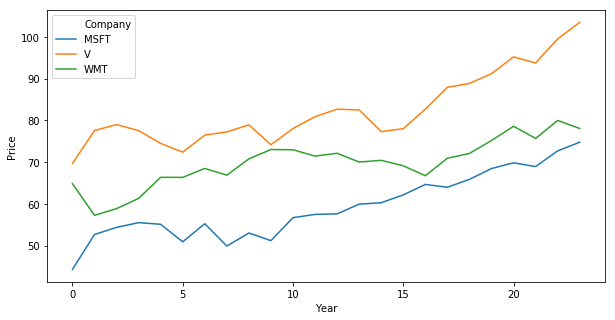

In [5]:
#the data is in wide form
#covert to long form to make a line plot 
plt.figure(figsize=(10,5))
df = market_price.unstack().reset_index()
df.columns = ['Company', 'Year', 'Price']
sns.lineplot(data=df, x='Year', y='Price', hue='Company', markers = False)
plt.show()

In [6]:
market_price.head(5)

,MSFT,V,WMT
0,44.259998,69.660004,64.839996
1,52.639999,77.580002,57.240002
2,54.349998,79.010002,58.840000
3,55.480000,77.550003,61.299999
4,55.090000,74.489998,66.360001


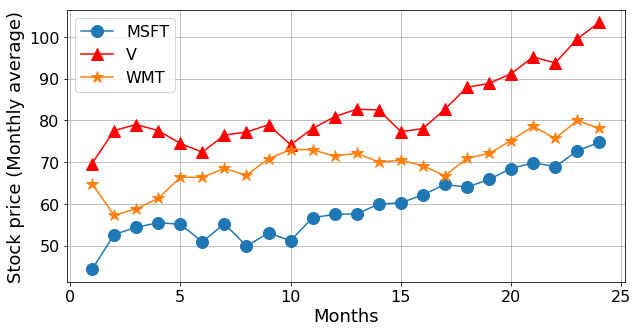

In [7]:
#the same figure in a different way
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,25)],market_price['MSFT'],marker='o',markersize=12)
plt.plot([i for i in range(1,25)],market_price['V'],c='red',marker='^',markersize=12)
plt.plot([i for i in range(1,25)],market_price['WMT'],marker='*',markersize=12)
plt.legend(market_price.columns,fontsize=16)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Stock price (Monthly average)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

In [0]:
market_rate = pd.DataFrame() #creating anempty dataframe that will be used to store monthly returns

In [9]:
#to calculate the monthly change in the market price of the three companies, we are using the average. 
#the first loop will look at every company
for col in market_price.columns:
    date = market_price.index[0] 
    p1 = market_price[col][date] #takes the price of the first month 
    for t in range(1,len(market_price.index)): #for every market price avilable for one company 
        date = market_price.index[t]
        p2 = market_price[col][date] #sets the price of second month. 
        returns = (p2-p1)/p1 #the change in price 
        market_rate.set_value(date,col,returns) #addidng the values in the dataframe created above
        p1 = p2 #changing the price of p1 for the next loop 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [10]:
market_rate.head(5) #chaecking the new dataframe

,MSFT,V,WMT
1,0.189336,0.113695,-0.117212
2,0.032485,0.018433,0.027952
3,0.020791,-0.018479,0.041808
4,-0.007030,-0.039458,0.082545
5,-0.076420,-0.028192,-0.000301


In [42]:
# getting the names of the columns
symbols = market_rate.columns
symbols

Index(['MSFT', 'V', 'WMT'], dtype='object')

In [16]:
#coverting to numpy matrix
return_data = market_rate.as_matrix().T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


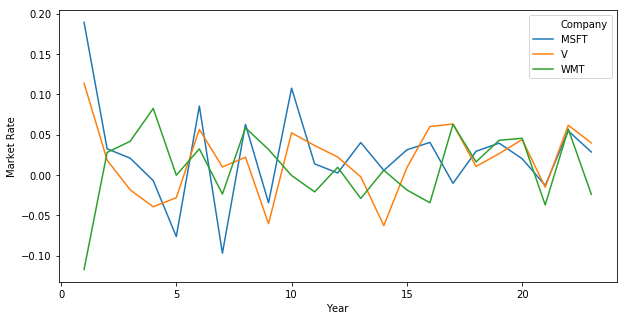

In [17]:
#the data is in wide form
#covert to long form to make a line plot 
plt.figure(figsize=(10,5))
new_df = market_rate.unstack().reset_index()
new_df.columns = ['Company', 'Year', 'Market Rate']
sns.lineplot(data=new_df, x='Year', y='Market Rate', hue='Company', markers = False)
plt.show()

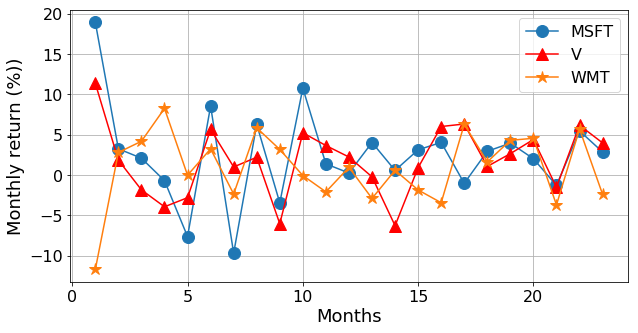

In [18]:
#
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,24)],100*market_rate['MSFT'],marker='o',markersize=12)
plt.plot([i for i in range(1,24)],100*market_rate['V'],c='red',marker='^',markersize=12)
plt.plot([i for i in range(1,24)],100*market_rate['WMT'],marker='*',markersize=12)
plt.legend(market_price.columns,fontsize=16)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Monthly return (%))",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

In [19]:
#shows the mean returns of the the three companies
mean_return = np.asarray(np.mean(return_data, axis=1))
mean_return

array([0.02461117, 0.01823726, 0.00906643])

In [46]:
#shows the co_varaince in a matrix form 
#the co-varaince shows the relationship between the companies in the portfolio 

co_variance = np.asmatrix(np.cov(return_data))
co_variance

matrix([[ 0.00336865,  0.0016328 , -0.00075249],
        [ 0.0016328 ,  0.00183242, -0.00056339],
        [-0.00075249, -0.00056339,  0.00197676]])

In [47]:
#I take a sqaure root of the co-vraince with respect to (j,j)
#to show the risk assocaited with the individual company
for j in range(len(symbols)):
    print ('%s: Expected return = %f, Risk rate = %f' %(symbols[j],mean_return[j], co_variance[j,j]**0.5))

MSFT: Expected return = 0.024611, Risk rate = 0.058040
V: Expected return = 0.018237, Risk rate = 0.042807
WMT: Expected return = 0.009066, Risk rate = 0.044461


In [0]:
#Here I aim to optimize my portfolio to get a two percent return
#and a minimum risk  
# Number of variables
n = len(symbols)

# The variables vector
x = Variable(n)

# The minimum return is assumed to be 2%
req_return = 0.02

# The return
ret = mean_return.T*x

# The risk in xT.Q.x format
risk = quad_form(x, co_variance)

# Setting the main problem definition with the Problem class from CVXPY
#which is minimizing risk and keeping the returns greater than or equal to zero 
prob = Problem(Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])

In [39]:
try:
    prob.solve()
    print ("Optimal portfolio")
    print ("----------------------")
    for s in range(len(symbols)):
       print (" Investment in {} : {}% of the portfolio".format(symbols[s],round(100*x.value[s],2)))
    print ("----------------------")
    print ("Exp ret = {}%".format(round(100*ret.value,2))) #finding the expected return
    print ("Expected risk = {}%".format(round(100*risk.value**0.5,2))) #finding the expected risk 
except:
    print ("Error")

Optimal portfolio
----------------------
 Investment in MSFT : 58.28% of the portfolio
 Investment in V : 20.43% of the portfolio
 Investment in WMT : 21.29% of the portfolio
----------------------
Exp ret = 2.0%
Expected risk    = 3.83%
